In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH']/(-365))
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH']/(-365))

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [3]:
# app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [4]:
# 產生corr_df
CORR = app_train.corr()['TARGET']
corr_df = pd.DataFrame()
corr_df['corr'] = CORR
corr_df.sort_values('corr',ascending=False)
corr_df_top15 = corr_df.sort_values('corr',ascending=False).head(15)
corr_df_last15 = corr_df.sort_values('corr',ascending=False).tail(15)

In [5]:
# 相關性Top15特徵
corr_top15_list = list(corr_df_top15.index)
print(corr_top15_list)
# 相關性Last15特徵
corr_last15_list = list(corr_df_last15.index)
print(corr_last15_list)

['TARGET', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'NAME_INCOME_TYPE_Working', 'DAYS_LAST_PHONE_CHANGE', 'CODE_GENDER_M', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3', 'OCCUPATION_TYPE_Laborers', 'DAYS_REGISTRATION']
['AMT_GOODS_PRICE', 'HOUSETYPE_MODE_block of flats', 'EMERGENCYSTATE_MODE_No', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'DAYS_EMPLOYED_ANOM', 'ORGANIZATION_TYPE_XNA', 'NAME_INCOME_TYPE_Pensioner', 'CODE_GENDER_F', 'NAME_EDUCATION_TYPE_Higher education', 'DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']


In [6]:
corr_df_print=[]
corr_df_print.extend(corr_top15_list)
corr_df_print.extend(corr_last15_list)

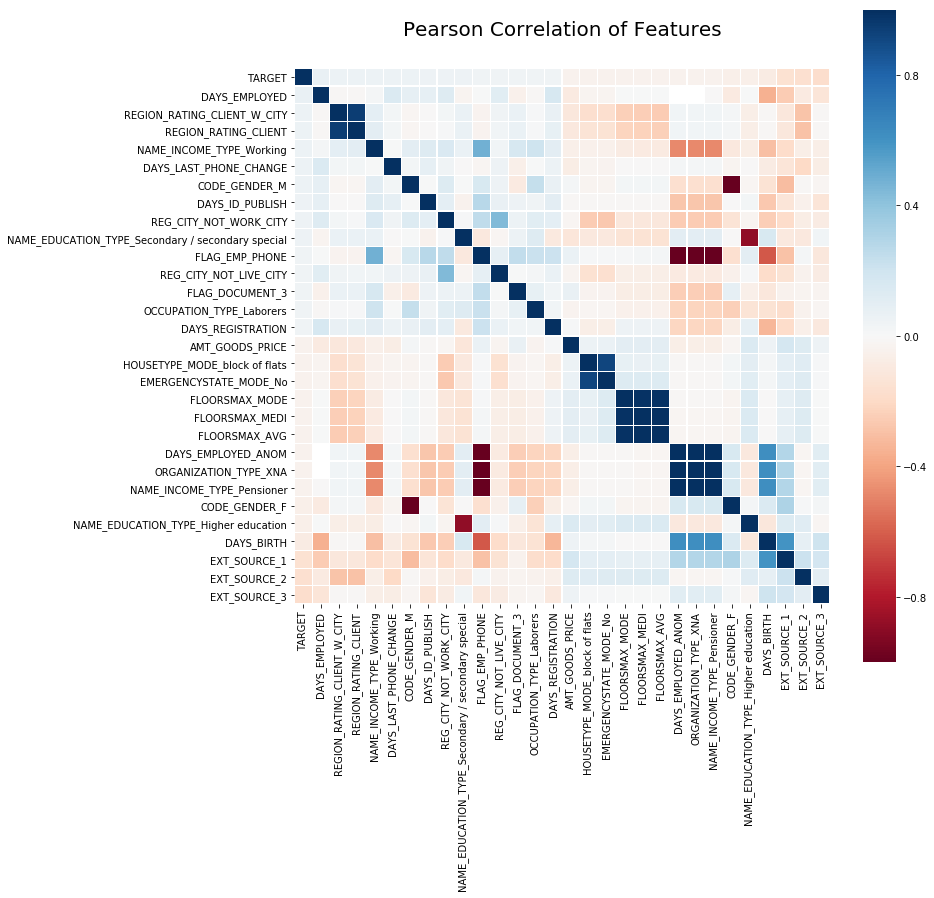

In [7]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(app_train[corr_df_print]
            .astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white')
plt.show()

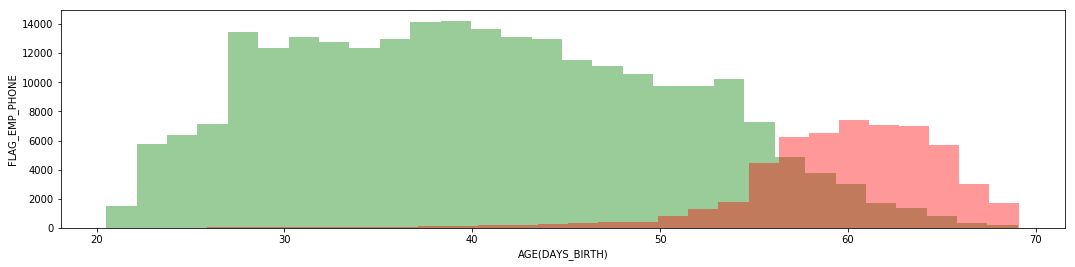

Correlation: -0.6199


In [16]:
# 'FLAG_EMP_PHONE'與 'DAYS_BIRTH' 的相關性為-0.619
# 由圖可見，年紀越大的人，越不會提供公司電話
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.distplot(app_train[app_train['FLAG_EMP_PHONE']==1]['DAYS_BIRTH'].dropna(),kde=False,color='g',bins=30)
sns.distplot(app_train[app_train['FLAG_EMP_PHONE']==0]['DAYS_BIRTH'].dropna(),kde=False,color='r',bins=30)
plt.xlabel('AGE(DAYS_BIRTH)')
plt.ylabel('FLAG_EMP_PHONE')
plt.show()
corr = np.corrcoef(app_train['FLAG_EMP_PHONE'], app_train['DAYS_BIRTH'])
print("Correlation: %.4f" % (corr[0][1]))

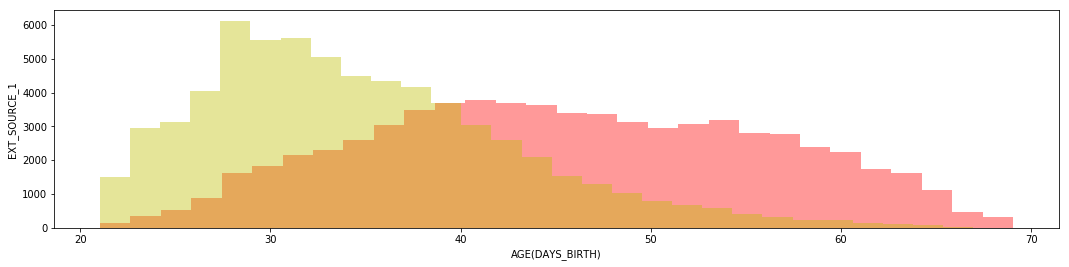

In [38]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
sns.distplot(app_train[app_train['EXT_SOURCE_1']>=0.5]['DAYS_BIRTH'].dropna(),kde=False,color='r',bins=30)
sns.distplot(app_train[app_train['EXT_SOURCE_1']<0.5]['DAYS_BIRTH'].dropna(),kde=False,color='y',bins=30)
plt.xlabel('AGE(DAYS_BIRTH)')
plt.ylabel('EXT_SOURCE_1')
plt.show()